# Numpy 科学计算库

ndarry  支持类似标量语法的运算，且  numpy  在大型数学运算上与原生  Python  相比速度快且占用内存少。以下是测试代码与测试结果。速度在  10  倍到  100  倍之间。

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 6.03 ms, sys: 11.6 ms, total: 17.6 ms
Wall time: 15.3 ms


In [4]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 485 ms, sys: 88.8 ms, total: 574 ms
Wall time: 571 ms


## Numpy ndarry：多维数组对象

ndaray  支持类似标量语法的运算。

先随机生成数据：

In [5]:
import numpy as np
data = np.random.randn(2, 3)
data

array([[ 0.59187086, -0.34910945, -0.44901142],
       [ 0.91950102, -0.1616836 , -0.29677292]])

然后对  data  进行一些数学操作：

In [6]:
data * 10

array([[ 5.91870863, -3.49109448, -4.49011424],
       [ 9.19501019, -1.61683601, -2.96772922]])

In [7]:
data + data

array([[ 1.18374173, -0.6982189 , -0.89802285],
       [ 1.83900204, -0.3233672 , -0.59354584]])

ndarry  是一个多维同类的数据容器，每个元素都是相同元素

每个数组都有  shape  ，表示数组在对应维度上的数量

每个数组都有  dtype  ，用于描述数组的数据类型

In [8]:
data.shape

(2, 3)

In [9]:
data.dtype

dtype('float64')

## 生成  ndarry

可以使用列表生成：

In [10]:
data1 = [6, 7.5, 8, 0, 1, ]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

也可以使用嵌套序列：

In [11]:
data2 = [[1, 2, 3, 4, ], [5, 6, 7, 8, ]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

想确定数组的维数，可以使用  ndim  属性确定数组的维度：

In [12]:
arr2.ndim

2

shape  属性返回一个  tuple  ，可以确定得到每一维的长度

In [13]:
arr2.shape

(2, 4)

除非显式指定，否则  np.array  会自动推断出数组的数据类型，存储在  dtype  中

In [14]:
arr1.dtype

dtype('float64')

In [15]:
arr2.dtype

dtype('int64')

如果需要创建高维的数组，就需要为  shape  传递一个数组。

zeros  函数可以创造全零数组：

In [16]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

ones  可以创造全一数组。

empty  可以创建一个没有初始化的数组。

不要用  empty  生成全零数组，它可能会存在非零值。

In [18]:
np.empty((2, 3, 2))

array([[[4.6657469e-310, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]],

       [[0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000],
        [0.0000000e+000, 0.0000000e+000]]])

arange  是  python  的内置函数  range  的数组版：

In [19]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

常用的函数表，numpy  在没有注明的情况下，默认生成  float64  类型的数据:

## ndarry 数据类型

数据类型  dtype  是  ndarry  为某一种类型数据所声明的内存块信息，也称为元数据。

In [20]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3, ], dtype=np.int32)

In [21]:
arr1.dtype

dtype('float64')

In [22]:
arr2.dtype

dtype('int32')

常用数据类型表：

可以使用  astype  的方法显式转换数组的数据类型

In [23]:
arr = np.array([1, 2, 3, 4, 5])

In [24]:
arr.dtype

dtype('int64')

In [25]:
float_arr = arr.astype(np.float64)

In [26]:
float_arr.dtype

dtype('float64')

如果是小数转整数，那么小数部分会被去掉

In [27]:
arr = np.array([3,7, -1.2, -2.6, 0.5, 12.9, 10.1, ])

In [28]:
arr

array([ 3. ,  7. , -1.2, -2.6,  0.5, 12.9, 10.1])

In [29]:
arr.astype(np.int32)

array([ 3,  7, -1, -2,  0, 12, 10], dtype=int32)

如果数据是字符串，那么可以使用  astype  将其转换为数字

In [30]:
numeric_strings = np.array(['1.25', '-9.6', '42', ], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

如果因为某些情况无法转换，将会抛出一个  ValueError

你可以使用另一个数组的  dtype  属性：

In [31]:
int_array = np.arange(10)
clibers = np.array([.22, .270, .357, .380, .44, .50, ], dtype=np.float64)
int_array.astype(clibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

也可以使用代码指定类型

In [32]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

**注意**，使用  astype  总是会生成一个新的数组，即使数据是一样的

## 数组运算

向量化，可以让你不需要循环操作就完成大量的运算工作，在不同规模的数组中使用算数运算叫做广播

In [33]:
arr = np.array([[1., 2., 3., ], [4., 5., 6., ]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

直接数组规模的乘法运算：

In [34]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [35]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

也可以直接与标量计算：

In [36]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [37]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

数组之间可以进行比较，生成一个  bool  数组：

In [38]:
arr2 = np.array([[0., 4., 1., ], [7., 2., 12., ]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [39]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## 索引

在一维数组时，与  python  自带的索引切片用法相同

In [40]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
arr[5]

5

In [42]:
arr[5:8]

array([5, 6, 7])

而对切片赋值会对所有对应位置都附上值：

In [43]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

numpy  的切片视图不是副本，而是直接修改原数组，切片返回的就是原数组而不是副本，需要注意

为了速度，为了内存，  numpy  的数组切片不会复制副本

In [44]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

当改变切片返回的数组，原数组也会改变：

In [45]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [46]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

如果希望返回副本，那么需要显式的指定一下才可以，例如:

In [47]:
arr[5:8].copy()

array([64, 64, 64])

二维数组索引返回的是一个数组：

In [48]:
arr_2d = np.array([[1, 2, 3,], [4, 5, 6, ], [7, 8, 9, ]])
arr_2d[2]

array([7, 8, 9])

如果需要准确的索引，可以有两种方式完成

第一个是索引行，第二个是索引列

In [49]:
arr_2d[0][2]

3

In [50]:
arr_2d[0, 2]

3

上升到更高维的也同理，返回的是低一维度的结果：

In [51]:
arr_3d = np.array([[[1, 2, 3, ], [4, 5, 6, ]], [[7, 8, 9, ], [10, 11, 12, ]]])
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

高纬度的索引也同理：

In [52]:
arr_3d[0]
old_values = arr_3d[0].copy()
arr_3d[0] = 42
arr_3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

可以直接赋值：

In [53]:
arr_3d[0] = old_values
arr_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

可以加逗号索引

In [54]:
arr_3d[1, 0]

array([7, 8, 9])

In [55]:
x = arr_3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [56]:
x[0]

array([7, 8, 9])

用切片索引时，一维的时候与  python  自带的索引相同：

In [57]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [58]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维的时候就有点不同了，切片此时是在索引列：

In [59]:
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [60]:
arr_2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

也可以两个维度同时切片索引：

In [61]:
arr_2d[:2, 1:]

array([[2, 3],
       [5, 6]])

也可以一个切片索引，一个数字索引：

In [62]:
arr_2d[1, :2]

array([4, 5])

In [63]:
arr_2d[:2, 2]

array([3, 6])

单独索引一列的技巧：

In [64]:
arr_2d[:, :1]

array([[1],
       [4],
       [7]])

也可以对切片索引赋值：

In [64]:
arr_2d[:2, 1:] = 0
arr_2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 布尔索引

先随机生成一部分数据：

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [66]:
data

array([[ 1.30080477, -0.04737855, -0.09592222,  0.23151275],
       [-0.28430093,  0.17383319,  0.40936524,  0.07228721],
       [-0.91204931, -1.59810306, -0.8881293 ,  2.48307966],
       [ 0.28954844,  0.07523277,  0.50683923,  0.40203642],
       [ 0.29005214, -1.86097286, -0.65740194,  0.20238668],
       [-1.94128809, -0.61003741, -1.14546534, -0.61418407],
       [-0.30610882, -0.20112727, -1.01081763,  0.47829707]])

names  数组和字符串  'Bob'  能产生一个布尔数组：

In [67]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

索引数组的时候可以使用布尔数组：

In [68]:
data[names == 'Bob']

array([[ 1.30080477, -0.04737855, -0.09592222,  0.23151275],
       [ 0.28954844,  0.07523277,  0.50683923,  0.40203642]])

当布尔数组长度不正确的时候，布尔值选择数据的方法并不会报错，需要小心这个地方。

同时还可以和其他索引方式一起使用：

In [69]:
data[names == 'Bob', 2:]

array([[-0.09592222,  0.23151275],
       [ 0.50683923,  0.40203642]])

In [70]:
data[names == 'Bob', 3]

array([0.23151275, 0.40203642])

同时也支持其他布尔表达式的使用，比如  `!=`  ,  `~`  

In [71]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [72]:
data[~(names == 'Bob')]

array([[-0.28430093,  0.17383319,  0.40936524,  0.07228721],
       [-0.91204931, -1.59810306, -0.8881293 ,  2.48307966],
       [ 0.29005214, -1.86097286, -0.65740194,  0.20238668],
       [-1.94128809, -0.61003741, -1.14546534, -0.61418407],
       [-0.30610882, -0.20112727, -1.01081763,  0.47829707]])

`~`  是取反。你可以对在任意的数组前使用这个表示取反。

In [73]:
cond = names == 'Bob'
data[~cond]

array([[-0.28430093,  0.17383319,  0.40936524,  0.07228721],
       [-0.91204931, -1.59810306, -0.8881293 ,  2.48307966],
       [ 0.29005214, -1.86097286, -0.65740194,  0.20238668],
       [-1.94128809, -0.61003741, -1.14546534, -0.61418407],
       [-0.30610882, -0.20112727, -1.01081763,  0.47829707]])

当简单的布尔表达式不能满足需求时，复杂的表的式同样也可以使用：

In [74]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [75]:
data[mask]

array([[ 1.30080477, -0.04737855, -0.09592222,  0.23151275],
       [-0.91204931, -1.59810306, -0.8881293 ,  2.48307966],
       [ 0.28954844,  0.07523277,  0.50683923,  0.40203642],
       [ 0.29005214, -1.86097286, -0.65740194,  0.20238668]])

Python  关键字  and  和  or  在布尔数组中不起作用，需要用  &  和  |  来代替。

同时你可以利用布尔数组做索引，然后对对应的位置赋值：

In [76]:
data[data < 0] = 0
data

array([[1.30080477, 0.        , 0.        , 0.23151275],
       [0.        , 0.17383319, 0.40936524, 0.07228721],
       [0.        , 0.        , 0.        , 2.48307966],
       [0.28954844, 0.07523277, 0.50683923, 0.40203642],
       [0.29005214, 0.        , 0.        , 0.20238668],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.47829707]])

你也可以分别对每一行或者每一列设置数值：

In [77]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.17383319, 0.40936524, 0.07228721],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.47829707]])

## 神奇索引

神奇索引使用整数数组来索引数据。

生成一个  8 * 4  的数组：

In [78]:
arr = np.empty((8, 4))
for i in range(8): arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

你可以通过传递一个数组，索引指定顺序：

In [79]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

同时你负数索引也没有问题：

In [80]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

也可以传入多个数组索引，但此时就是根据每个索引的元素顺序，指定一个坐标，最终结果是生成一个一维数组：

In [81]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [82]:
arr[[1, 5, 7, 2, ], [0, 3, 1, 2, ]]

array([ 4, 23, 29, 10])

神奇索引的结果总是一维的。

神奇索引总是把数据复制到一个新的数组中。

In [83]:
arr[[1, 5, 7, 2, ]][:, [0, 3, 1, 2, ]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## 数组的转置和换轴

使用  T  属性可以将数组转置：

In [84]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [85]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

可以使用  `np.dot()`  计算矩阵内积：

In [86]:
arr = np.random.randn(6, 3)
arr

array([[-0.76692774, -0.11494089,  1.34332772],
       [ 1.14443684,  0.78282403, -1.72394439],
       [-1.61115002, -0.02198034,  0.47608786],
       [ 1.21940992,  1.5639033 ,  1.58481443],
       [-0.44478868, -0.71036226,  0.38155651],
       [ 0.43307326, -0.68234883, -0.39311387]])

In [87]:
np.dot(arr.T, arr)
# np.dot(arr, arr.T)

array([[ 6.36606818,  2.94695088, -2.17765042],
       [ 2.94695088,  4.04251599,  0.96128102],
       [-2.17765042,  0.96128102,  7.81493395]])

而使用  `transpose()`  可以制定置换轴，再转置：

In [88]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [89]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

使用  `swapaxes()`  可以对数组里的轴进行陶正，重组数据：

In [90]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [91]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数，快速逐元素数组函数

通用函数，又称  `ufunc`  ，是一种在  ndarray  数据中进行逐元素操作的函数。

通用函数就是对一些简单函数的向量化封装

很多  `ufunc`  是简单的逐元素转换，比如  `sqrt`  或  `exp`  函数：

In [92]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [94]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

有些通用函数比如  `add`  或  `maximum`  则会接收两个数组并返回一个数组作为结果,  因此称为二元通用函数:

In [95]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([-0.17701617, -0.84962591, -0.49177907,  0.38069538, -0.24264538,
       -0.83592449,  0.14003836, -2.06145373])

In [96]:
y

array([-0.3743781 , -0.7001138 ,  1.83561077,  0.63830782,  0.68811353,
        1.67926926,  0.32569664,  0.09953414])

In [97]:
np.maximum(x, y)

array([-0.17701617, -0.7001138 ,  1.83561077,  0.63830782,  0.68811353,
        1.67926926,  0.32569664,  0.09953414])

这里的  `maximum`  将两个向量较大的元素筛选了出来.

也用通用函数返回多个数组,比如  `modf`  ,  是  python  内建函数  `divmod`  的向量化版本.

它会返回一个整数部分的数组和小数部分的数组:

In [98]:
arr = np.random.randn(7) * 5
arr

array([-2.73875718,  3.72945431, -7.71453928,  1.37338042,  4.04728115,
       -8.72501042, -2.17687299])

In [99]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.73875718,  0.72945431, -0.71453928,  0.37338042,  0.04728115,
       -0.72501042, -0.17687299])

In [100]:
whole_part

array([-2.,  3., -7.,  1.,  4., -8., -2.])

通用函数会提供一个参数  `out`  ,  你可以指定返回结果的接收位置:

In [101]:
arr

array([-2.73875718,  3.72945431, -7.71453928,  1.37338042,  4.04728115,
       -8.72501042, -2.17687299])

In [102]:
np.sqrt(arr)

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in sqrt


array([       nan, 1.93117951,        nan, 1.17191315, 2.01178556,
              nan,        nan])

In [103]:
np.sqrt(arr, arr)

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in sqrt


array([       nan, 1.93117951,        nan, 1.17191315, 2.01178556,
              nan,        nan])

In [104]:
arr

array([       nan, 1.93117951,        nan, 1.17191315, 2.01178556,
              nan,        nan])

还有一元通用函数表:

## 使用数组进行面向数组编程

使用  Numpy  数组表达式能够完成多种数据操作任务, 无需写大量的循环, 称为向量化. 

以下是简单示例:

In [105]:
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [106]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot $\\sqrt{x^2, y^2}$ for a grid of values')

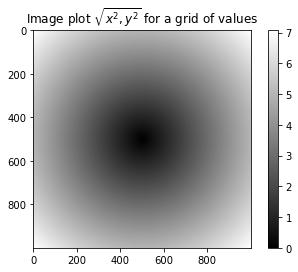

In [107]:
from matplotlib import pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot $\sqrt{x^2, y^2}$ for a grid of values")

### 将条件逻辑作为数组操作

`numpy.where`  函数是三元表达式  `x if condition else y`  的向量化版本.


In [109]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])


假设我们需要根据  cond  的情况选择  xarr  和  yarr  的元素, 那么使用列表推导式的代码如下:

In [110]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

如果使用  python  解释器完成这一工作, 那么会比较慢. 而使用  `numpy.where`  可以规避这一问题:

In [111]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

`np.where`  的后两个参数不一定要是向量, 可以是两个标量. 

假如你有一个随机生成的矩阵数据, 并且想将其中的正值替换成  2  , 所有的负值替换成  -2  :

In [112]:
arr = np.random.randn(4, 4)
arr

array([[-2.61808073, -0.51647541, -0.75660061,  0.02760766],
       [-0.25545171, -1.37865949, -2.81459081, -0.53790326],
       [-1.5274185 , -0.22304249, -0.90227762, -1.53246656],
       [-1.96703457, -0.32957181,  0.30906505,  1.40770494]])

In [113]:
arr > 0

array([[False, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [False, False,  True,  True]])

In [114]:
np.where(arr > 0, 2, -2)

array([[-2, -2, -2,  2],
       [-2, -2, -2, -2],
       [-2, -2, -2, -2],
       [-2, -2,  2,  2]])

你也可以将向量和标量结合起来:

In [115]:
np.where(arr > 0, 2, arr)

array([[-2.61808073, -0.51647541, -0.75660061,  2.        ],
       [-0.25545171, -1.37865949, -2.81459081, -0.53790326],
       [-1.5274185 , -0.22304249, -0.90227762, -1.53246656],
       [-1.96703457, -0.32957181,  2.        ,  2.        ]])

### 数学和统计方法

Numpy  中, 可以使用聚合函数，或者叫做缩减函数。可以在实例调用，也可以在顶层调用


In [116]:
arr = np.random.randn(5, 4)
arr

array([[ 0.6011139 , -1.45697285,  0.57899701,  0.48230515],
       [-0.66282021,  0.56210621,  0.69825054, -0.83332482],
       [-0.00187285,  0.26328617, -0.33314291, -0.4376516 ],
       [ 1.04930811,  0.00509934, -0.77936045,  0.41916465],
       [ 0.75209111, -0.73048601,  0.81923936,  1.07341501]])

In [117]:
arr.mean()

0.10343724370418891

In [118]:
np.mean(arr)

0.10343724370418891

In [119]:
arr.sum()

2.0687448740837784

像  `mean`, `sum`  等函数可以接收一个可选参数  `axis`  .

axis = 1  计算的是每一列，  axis = 0  计算的是每一行

In [120]:
arr.mean(axis=1)

array([ 0.0513608 , -0.05894707, -0.1273453 ,  0.17355291,  0.47856487])

In [121]:
arr.sum(axis=0)

array([ 1.73782006, -1.35696713,  0.98398355,  0.70390839])

像  `cumsum`  和  `cumprod`  的不会聚合，他们会产生中间结果

In [122]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [123]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

这种函数也可以指定  `axis`  来确定聚合方向


In [124]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [125]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

统计方法列表:

### 布尔值数组的方法

布尔值是强制值  1  或者  0，因此  sum  可以用于计算布数组中  True  的个数

In [126]:
arr = np.random.randn(100)
(arr > 0).sum()

51

`any`  方法检查数组是否存在有一个  True  , `all`  检查是否每个值都是  True

In [127]:
bools = np.array([False, False, True, False])
bools.any()

True

In [128]:
bools.all()

False

### 排序

numpy  数组可以使用  sort  方法排序, 结果会在原数组上反映出来.

In [129]:
arr = np.random.randn(6)
arr

array([-0.81554231, -1.65776725, -0.98797746, -0.47043359,  0.20663214,
       -1.6834752 ])

In [130]:
arr.sort()
arr

array([-1.6834752 , -1.65776725, -0.98797746, -0.81554231, -0.47043359,
        0.20663214])

二维数组可以指定排序的方向:

In [131]:
arr = np.random.randn(5, 3)
arr

array([[-0.16896009,  0.63310769,  0.10799522],
       [ 0.01595031,  0.165188  ,  1.34211683],
       [ 0.19118237, -0.23466773,  0.17658258],
       [ 1.33591953,  1.12676579,  0.43522575],
       [-1.24060124, -0.03130947, -1.78475424]])

In [132]:
arr.sort(1)
arr

array([[-0.16896009,  0.10799522,  0.63310769],
       [ 0.01595031,  0.165188  ,  1.34211683],
       [-0.23466773,  0.17658258,  0.19118237],
       [ 0.43522575,  1.12676579,  1.33591953],
       [-1.78475424, -1.24060124, -0.03130947]])

顶层的  sort  函数返回的是一个副本，而不是原数组

In [133]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))]

-1.7180149726898157

### 唯一值与其他集合逻辑

Numpy  中一些关于集合的基本函数操作

`np.unique`  返回数组里的所有唯一值，并排序:

In [134]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [135]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

下面是纯  python  实现:

In [136]:
sorted(set(names))

['Bob', 'Joe', 'Will']

`np.in1d`  检查一个数组的值是否在另一个数组中，并返回一个布尔值数组

In [137]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

集合函数列表:

## 使用数组进行文件输入和输出

`np.save`  和  `np.load`  是两大高效存储硬盘数据的工具函数.

数组在默认情况下是以压缩格式进行存储的, 后缀名是 .npy :

In [138]:
arr = np.arange(10)
np.save('some_array', arr)
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果忘记写  .npy  了, 会自动帮忙加上.

可以使用  `np.savez`  将数组作为参数传递给该函数, 可以用来保存多个数组:

当载入的时候, 就能获得字典型的对象, 在字典用可以方便的载入单个数组:

In [139]:
np.savez('array_archive.npz', a=arr, b=arr)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [140]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

如果你想往数据文件里再加入一个数组,  可以使用  `arrays_compressed.npz`  来将数据压入已经压缩的文件:

In [141]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [142]:
!rm array_archive.npz
!rm arrays_compressed.npz
!rm some_array.npy

## 线性代数

numpy  中用于进行矩阵运算的操作

比如矩阵点乘, 可以使用  `dot`  函数:

In [143]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [144]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [145]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [146]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

顶层的  `dot()`  函数和实例的是等价的.

一个二维数组和一个长度合适的一维数组的点乘是一个一维数组, 不用去特定思考方向.

In [147]:
np.dot(x, np.ones(3))

array([ 6., 15.])

特殊符号  `@`  可以作为点乘的符号来使用:

In [148]:
x @ np.ones(3)

array([ 6., 15.])

`numpy.linalg`  拥有一个矩阵分解的标准函数集, 以及其他常用函数, 例如求逆和行列式求解.

In [149]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)

array([[   404.14049119,   -435.63491106,   1338.20797506,
         -3051.66648478,    598.91940924],
       [  -435.63491106,    475.47573351,  -1455.70186969,
          3317.59393968,   -647.5898087 ],
       [  1338.20797506,  -1455.70186969,   4471.68589938,
        -10181.33378221,   1985.68450425],
       [ -3051.66648478,   3317.59393968, -10181.33378221,
         23202.10636079,  -4533.44807778],
       [   598.91940924,   -647.5898087 ,   1985.68450425,
         -4533.44807778,    890.57059001]])

In [150]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.68193916e-13,  9.47275689e-13,
        -5.55438574e-13, -3.45061401e-13],
       [-1.26001505e-13,  1.00000000e+00, -1.02277505e-13,
         4.04735981e-13, -1.19650558e-13],
       [-1.41862997e-13,  2.03196601e-13,  1.00000000e+00,
        -1.25374444e-13, -1.90171778e-13],
       [-3.97841063e-13,  2.34861503e-13, -3.90274777e-13,
         1.00000000e+00, -3.56749293e-13],
       [ 3.30177481e-13, -3.03385509e-13, -9.24612111e-13,
        -3.21440013e-12,  1.00000000e+00]])

In [151]:
q, r = qr(mat)
r

array([[-8.95154995e+00, -2.99950615e+00,  1.05034864e+01,
         6.50116217e+00,  1.35144071e+01],
       [ 0.00000000e+00, -1.35609671e+00,  7.82099503e-01,
         6.89168315e-01,  7.78249535e-01],
       [ 0.00000000e+00,  0.00000000e+00, -5.96252642e-01,
        -3.52895542e-01, -4.66971557e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.96379855e-02, -1.51697102e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.95866612e-04]])

常用的  `numpy.linalg`  函数表:


## 伪随机数生成

`numpy.random`  可以高效生成多种概率分布下的完整样本值数组.

例如你可以用  `normal`  获取正态分布的数组:

In [152]:
samples = np.random.normal(size=(4, 4))
samples

array([[-1.90484997,  2.2955847 ,  1.1797738 ,  0.8961022 ],
       [-0.62093054, -1.3845378 , -2.62850509,  0.67664849],
       [ 0.82007649,  1.8742137 ,  0.19278913, -0.65050715],
       [ 0.840741  ,  0.24547953, -0.2969386 , -1.13949919]])

`numpy.random`  生成随机数的速度快了一个数量级

In [153]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

536 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [154]:
%timeit np.random.normal(size=N)

20.6 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


这些都是伪随机数, 可以通过  `np.random.seed`  改变  Numpy  的随机数种子

In [155]:
np.random.seed(1234)


但上面的方法是全局的, 如果希望使用局部的, 可以使用  `np.random.RandomState`  创建一个随机数生成器.

In [156]:
rng = np.random.RandomState(1234)

In [157]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

随机函数表:

## 随机漫步

随机漫步的一个示例

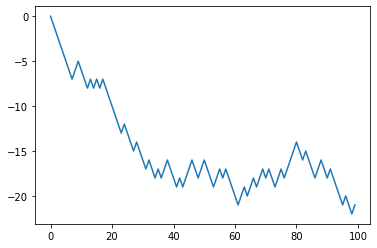

In [152]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
plt.plot(walk[:100])

In [153]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-9

In [154]:
walk.max()

60

In [155]:
(np.abs(walk) >= 10).argmax()

297

In [156]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   3, ...,  46,  47,  46],
       [  1,   0,   1, ...,  40,  41,  42],
       [  1,   2,   3, ..., -26, -27, -28],
       ...,
       [  1,   0,   1, ...,  64,  65,  66],
       [  1,   2,   1, ...,   2,   1,   0],
       [ -1,  -2,  -3, ...,  32,  33,  34]])

In [157]:
walks.max()

122

In [158]:
walks.min()

-128

In [159]:
hist30 = (np.abs(walks) >= 30).any(1)
hist30

array([ True,  True,  True, ...,  True, False,  True])

In [160]:
crossing_times = (np.abs(walks[hist30]) >= 30).argmax()
crossing_times.mean()

133.0

In [161]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))